In [210]:
import numpy as np

In [211]:
import numpy.random as nr

In [212]:
import matplotlib.pyplot as plt

In [213]:
NTl = 1000 #Numero de atomos de Tl
NPb = 0 #Numero de atomos de Pb
h = 1  # intervalo de tiempo
tau = 3.053*60  #tiempo de vida media
p = 1 - 2**(-h/tau) #probabilidad de decaimiento

NTalios = [NTl]
NPlomos = [NPb]

tmax = 1000 

for _ in range(1,tmax,h):

    decays = 0 #Cuenta el número de ´átomos que decayeron en el tiempo t
    for i in range(NTl):
        r = nr.random()
        if r < p: #Moneda sesgada
            decays += 1
    NTl -= decays
    NPb += decays
    NTalios.append(NTl)
    NPlomos.append(NPb)

tpoints = np.arange(0,tmax,h)
logNtalio=np.log(NTalios)

In [214]:
def funcion1(NTl,t,tau):
    Ntalfunc=NTl*2**(-t/tau)
    return Ntalfunc

In [215]:
def lineFitmod(x, y, s):
    xavg = x.mean()
    N=x.size
    xgorr=(x/s).sum()/(1/s).sum()
    ygorr=(y/s).sum()/(1/s).sum()
    b = ((y * (x - xgorr))/s).sum()/ ((x * (x - xgorr))/s).sum()
    a = ygorr - b * xgorr
    f=b*x+a
    Chi_cuad=((y-f)**2/s).sum()
    Chi_cuad_red=Chi_cuad/N-2
    sigma_b_cuad=1/(((x-xgorr)*x/s).sum())
    sigma_a_cuad=sigma_b_cuad*(((x**2/s).sum())/((1/s).sum()))
    return b, a, Chi_cuad_red, sigma_b_cuad, sigma_a_cuad 

In [216]:
def lineFit(x, y):
    xavg = x.mean()
    slope = (y * (x - xavg)).sum() / (x * (x - xavg)).sum()
    yint = y.mean() - slope * xavg
    return slope, yint

In [217]:
Vidamedia , talinical = lineFit(tpoints,logNtalio) 
print(-1/Vidamedia)

249.23090083887166


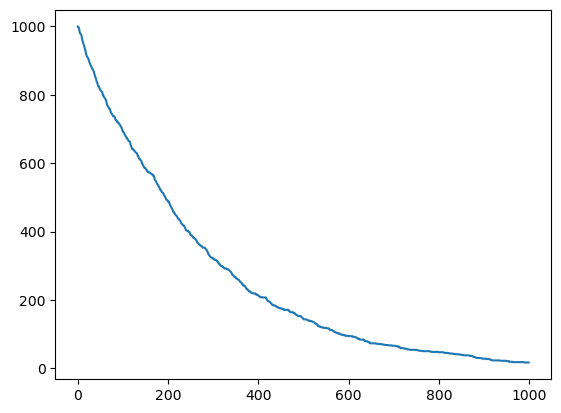

In [218]:
plt.plot(tpoints,NTalios)

In [220]:
def minimoscuadrados(x, y):
    X = np.vstack([x, np.ones(len(x))]).T
    m,b= np.linalg.lstsq(X, y, rcond=None)[0]
    return m,b

In [221]:
NTalios_func = funcion1(NTl, tpoints, tau)
pendiente,ordenada = minimoscuadrados(tpoints, NTalios)

In [222]:
NTalios_arr = np.array(NTalios)
fit=pendiente*NTalios_arr+ordenada

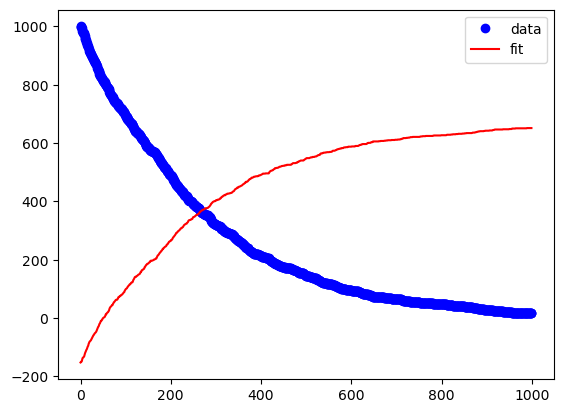

In [223]:
plt.plot(tpoints, NTalios,'bo', label='data')
plt.plot(tpoints, fit,'r-', label='fit')
plt.legend()
plt.show()